In [1339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from unidecode import unidecode


In [1340]:
ruta_general ='Datos_listos'
dt_companies=pd.read_csv(ruta_general+'/t_companies.csv')
dt_call = pd.read_csv(ruta_general+'/t_open_calls.csv')
dt_user = pd.read_csv(ruta_general+'/t_users.csv')



# Conozcamos a Nuestro Talento: Un Análisis del Perfil de los Talentos en Talentpitch (2021-2023)

En esta sección, nos sumergiremos en una evaluación exhaustiva de todo lo relacionado con el talento que ha sido parte de Talentpitch durante el período comprendido entre 2021 y 2023. Nuestro objetivo es obtener una comprensión profunda y significativa de los aspectos clave relacionados con el talento en esta plataforma.

A lo largo de este análisis, abordaremos diversas preguntas y temáticas, desde la preferencia de carreras y habilidades, hasta las tendencias en la búsqueda de empleo y las características lingüísticas dominantes. A través de esta exploración, buscamos proporcionar respuestas fundamentadas y valiosas que no solo arrojen luz sobre la composición del talento, sino que también contribuyan a la mejora continua de la plataforma.

¡Acompáñanos en este viaje para conocer de cerca a nuestro talento y comprender mejor cómo Talentpitch ha sido un espacio para el crecimiento y el encuentro entre profesionales y oportunidades laborales!

**Explorando las Preferencias y Aspiraciones Profesionales: Carreras y Roles Más Comunes entre los Usuarios Registrados**

En esta sección, nos sumergiremos en el fascinante mundo de las preferencias profesionales de nuestros usuarios registrados en Talentpitch. Nos proponemos responder a dos preguntas fundamentales: ¿Cuáles son las carreras más comunes entre nuestro talento? y ¿Cuáles son los roles laborales más deseados?

A través del análisis de los perfiles de los usuarios, exploraremos las tendencias destacadas en cuanto a elecciones de carrera, identificando aquellas áreas que atraen a un mayor número de profesionales. Además, nos sumergiremos en la investigación de los roles laborales que suscitan un mayor interés entre nuestros talentos registrados.

Este análisis no solo arrojará luz sobre las preferencias actuales, sino que también proporcionará información valiosa sobre las direcciones que puede tomar el talento en el futuro. ¡Vamos a descubrir juntos las carreras más populares y los roles laborales más codiciados en la comunidad de Talentpitch!

In [1341]:
# quitar tildes
dt_user['career'] = dt_user['career'].apply( unidecode)


In [1342]:
def Determinar_area(dato):
    areas_de_interes = {
    'sales': ['ventas', 'marketing', 'comercio'],
    'market': ['marketing','mercadeo','publicidad'],
    'consumer': ['comercio'],
    'finance': ['finanzas', 'contaduría', 'economía','economia','contador','contaduria','trader'],
    'communications': ['comunicaciones', 'negocios internacionales','comunicación','internacionales'],
    'logistics': ['logística','mantenimiento'],
    'design': ['diseño', 'arte', 'animación', 'audiovisual', 'musica', 'cine','diseñadora','diseñador','diseno','decoración','decoracion'],
    'tech': ['electronica','adsi','mecatrónica','bases de datos','software','redes', 'sistemas', 'ingeniería', 'ingeniero', 'desarrollo', 'tecnología', 'informática', 'técnico', 'ing', 'programacion', 'programación', 'desarrollador', 'dev', 'automatizacion', 'internet', 'ti'],
    'product': ['producto'],
    'channels': ['canales'],
    'strategy': ['estrategia', 'analista', 'cientifico', 'bi','business','inteligencia'],
    'production': ['producción', 'qa'],
    'talent': ['talento', 'gestión humana', 'RRH', 'social','humanos'],
    'quality': ['calidad'],
    'rse': ['administrador', 'administracion', 'empresas', 'empresarial', 'direccion','administración','innovación','proyectos','proyecto'],
    'suppliers': ['proveedores', 'freelancer'],
    'legal': ['derecho','abogado','abogada'],
    'incomes': ['ingresos'],
    'education': ['maestria', 'licenciatura', 'educacion', 'pedagogía'],
    }
    for area,lista in areas_de_interes.items():
        for item in lista:
            if dato.lower().__contains__(item):
                return area
    return 'others'
    
dt_user['thematic_area']=dt_user['career'].apply(lambda x: Determinar_area(x))


In [1343]:
traductor_area = { y:x for x,y in dt_call[['thematic_area_id','thematic_area']].to_numpy()}
n_categorias = len(dt_call['thematic_area_id'].unique())

frecuencia_categorias = pd.DataFrame([ traductor_area[x] for x in dt_user[dt_user['thematic_area'] != 'others']['thematic_area']],columns=['thematic_area_id',])
frecuencia_categorias['thematic_area'] = dt_user['thematic_area']


print("Cantidad de usuarios por la categoria `thematic_area`")
frecuencia_categorias['thematic_area'].value_counts().sort_values(ascending=False)


Cantidad de usuarios por la categoria `thematic_area`


thematic_area
tech              529
others             94
rse                45
design             42
finance            36
communications     34
talent             33
quality            23
strategy           12
sales              11
legal               9
market              9
education           8
logistics           6
Name: count, dtype: int64

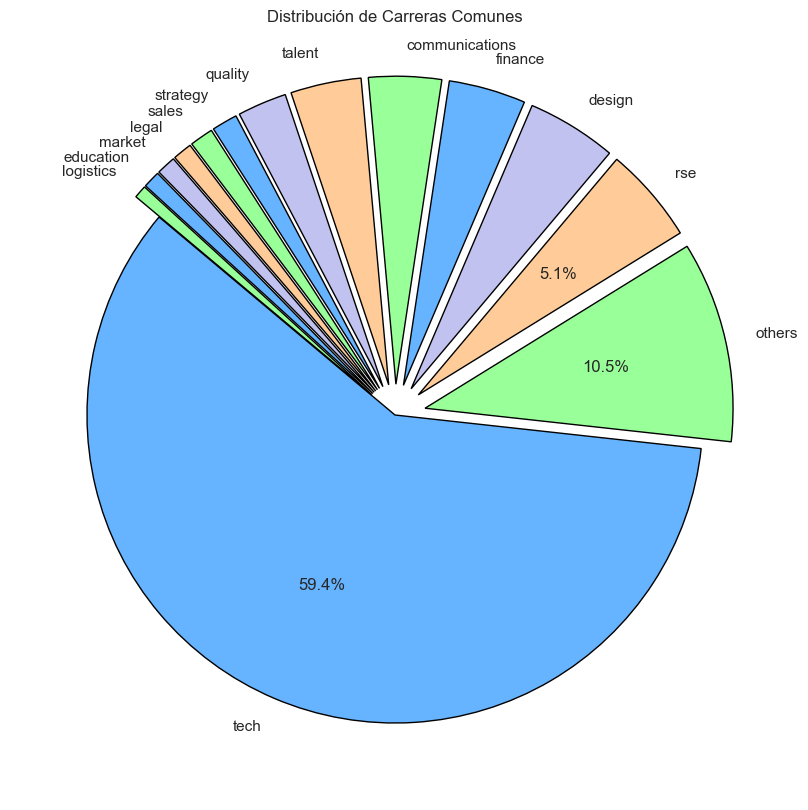

In [1344]:
carreras_comunes=dict(frecuencia_categorias['thematic_area'].value_counts().sort_values(ascending=False))
# Crear un gráfico circular
plt.figure(figsize=(10,10))  # Ajustar el tamaño del gráfico según tus necesidades
explode_space = [0.1 if i >= min(carreras_comunes.values())  and i < max(carreras_comunes.values()) else 0 for i in carreras_comunes.values()]

plt.pie(list(carreras_comunes.values()), labels=list(carreras_comunes.keys()),wedgeprops=dict(edgecolor='black'),explode=explode_space, autopct=lambda p: '{:.1f}%'.format(p) if p > 5 else '', startangle=140,colors=['#66b3ff','#99ff99','#ffcc99','#c2c2f0'])

# Agregar un título
plt.title('Distribución de Carreras Comunes')

# Mostrar el gráfico
plt.show()


**Conclusion de este analisis**

Durante nuestro análisis, observamos una tendencia clara: de cada `100` talentos, un notable `59` de ellos se especializan en el área tecnológica (tech). Este hallazgo resalta la significativa representación de profesionales tecnológicos en la plataforma, indicando un fuerte interés y presencia en ese campo.

De manera sorprendente, también identificamos que, dentro del mismo grupo de `100` talentos, `10` de ellos no han especificado un área de especialización, categorizándolos como talentos de áreas desconocidas. Esta revelación subraya la diversidad de perfiles presentes en la plataforma, mostrando una variedad de talentos que pueden ofrecer habilidades valiosas, aunque no se hayan asignado a una categoría específica.

Estos insights son cruciales para entender la composición demográfica y las preferencias de los talentos, proporcionando una base sólida para estrategias y decisiones futuras.

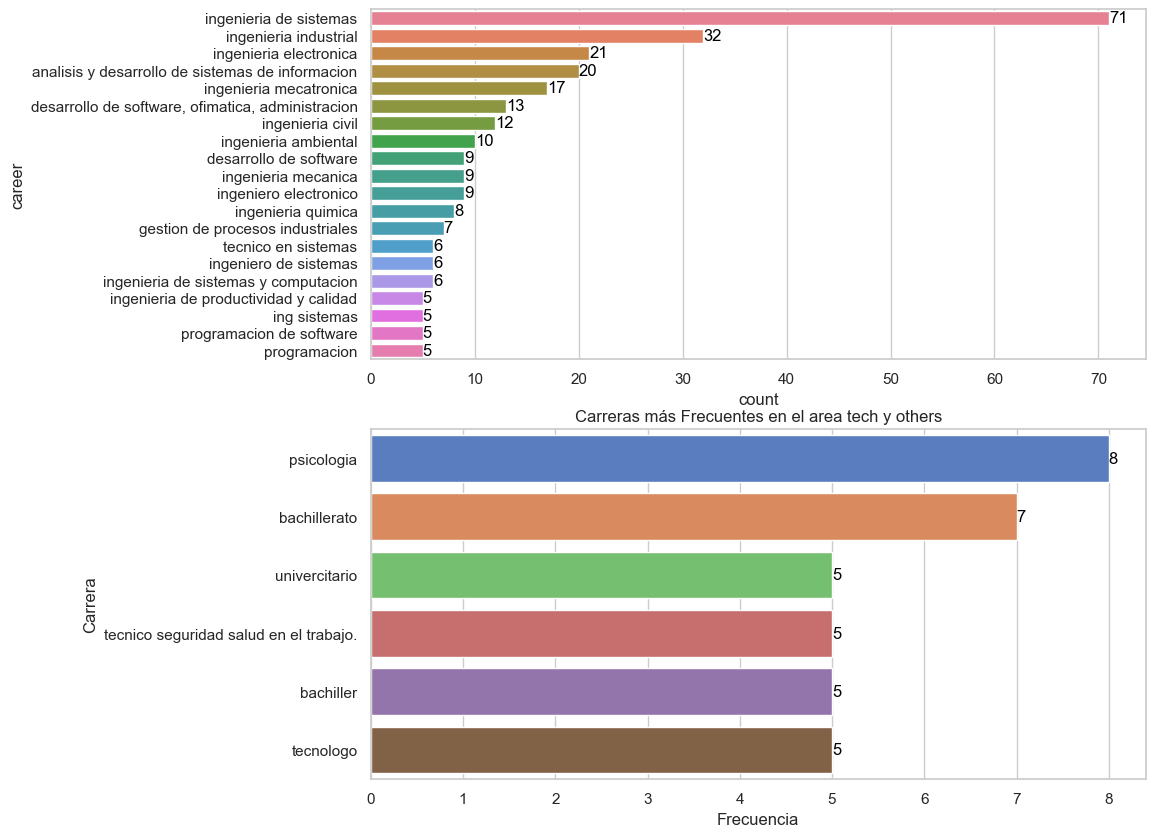

In [1345]:
talent_tech = dt_user[dt_user['thematic_area'] =='tech']['career'].value_counts()
others_talents = dt_user[dt_user['thematic_area'] =='others']['career'].value_counts()
top = 5

#Grafica
fig,ax = plt.subplots(2,1,figsize=(10,10))
top_career_talent =talent_tech[talent_tech >= top]
top_others_talent = others_talents[others_talents >=top]

sns.barplot(x=top_others_talent,y=top_others_talent.index,hue=top_others_talent.index,ax=ax[-1])

sns.barplot(x=top_career_talent,y=top_career_talent.index,hue=top_career_talent.index,ax=ax[0])

for index, value in enumerate(top_career_talent):
    ax[0].text(value, index, str(value), ha='left', va='center', color='black', fontsize=12)

for index, value in enumerate(top_others_talent):
    ax[-1].text(value, index, str(value), ha='left', va='center', color='black', fontsize=12)

plt.title('Carreras más Frecuentes en el area tech y others')
plt.xlabel('Frecuencia')
plt.ylabel('Carrera')
plt.show()


**Exploración del Talento en TalentPitch: Dominio Tecnológico en el Punto de Mira**

En esta fase de análisis, hemos delineado un panorama notable: el mayor contingente de talento en TalentPitch está firmemente arraigado en el ámbito tecnológico (tech), con un impresionante total de 595 talentos. Este grupo representa un significativo 59.50% del conjunto de datos total, revelando una clara inclinación hacia las disciplinas tecnológicas dentro de nuestra comunidad.

Profundizando en el tejido de carreras tecnológicas, surge una protagonista destacada: 'Ingeniería de Sistemas'. Esta carrera lidera el campo tecnológico, atrayendo a un sólido 42.24% de los talentos en esta área específica. Este dato sugiere un enfoque significativo en habilidades y roles asociados con la ingeniería de sistemas entre los profesionales tecnológicos de TalentPitch.




### **Explorando Preferencias Laborales por Industria: Un Análisis Profundo de los Tipos de Contrato Buscados**

En esta etapa de nuestro análisis, nos embarcamos en un viaje para descubrir las preferencias laborales en cuanto al tipo de contrato, desglosadas por diversas industrias presentes en TalentPitch. La pregunta que nos guía es: ¿Cuál es el tipo de contrato que buscan las diferentes industrias?

A través de este análisis, pretendemos arrojar luz sobre las preferencias específicas de contratación en industrias específicas. ¿Predominan los contratos a tiempo completo en ciertos sectores? ¿Las industrias creativas prefieren contratos temporales? Estas son algunas de las preguntas que nos propusimos responder para entender mejor las dinámicas laborales en nuestra comunidad.



In [1346]:
#crear columnas year,mount and day
dt_user[['fecha','hora']] = dt_user['updated_at'].str.split(' ',expand=True)
dt_user[['year','mount','day']] = dt_user['fecha'].str.split('-',expand=True)

contrato_tiempo = dt_user[dt_user['want_to_be'] != '["a"]']
#Determinar la cantidad de puestos deseados dado en año y la industria 
contrato_tiempo = contrato_tiempo.groupby(['year','want_to_be','thematic_area'])['thematic_area'].count()
# Evaluar los mejores 
# contrato_tiempo = contrato_tiempo[contrato_tiempo >5]
contrato_tiempo= pd.DataFrame([ list(contrato_tiempo.index),list(contrato_tiempo.values)],index=['dt''a','cantidad']).T

contrato_tiempo[['year','want_to_be','thematic_area']] = contrato_tiempo['dta'].apply(pd.Series)
contrato_tiempo=contrato_tiempo.drop('dta',axis=1)


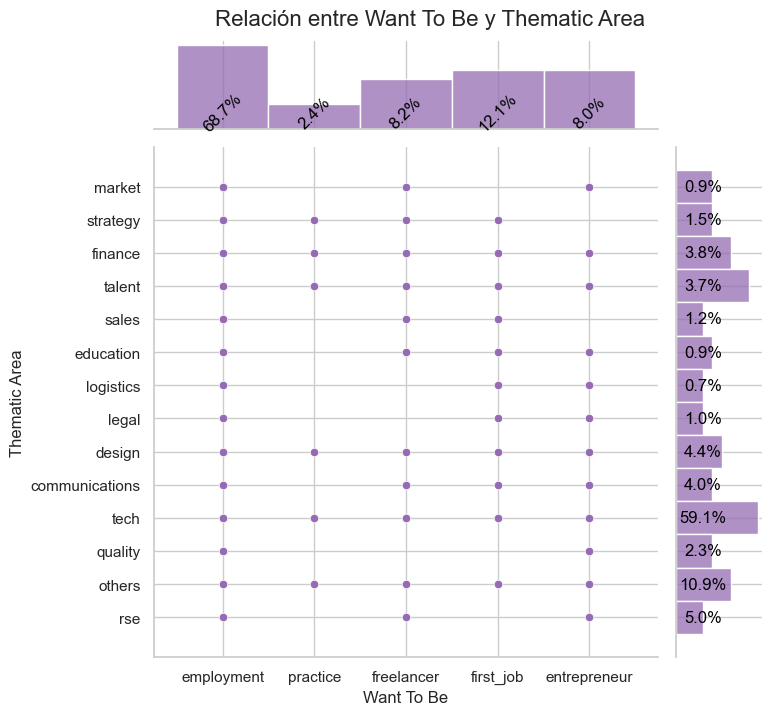

In [1347]:
sns.set(style="whitegrid", palette="muted", color_codes=True)
plot = sns.jointplot(x='want_to_be', y='thematic_area', data=contrato_tiempo.sort_values('cantidad'), height=7, color='m', kind='scatter')
plot.set_axis_labels('Want To Be', 'Thematic Area', fontsize=12)
plot.fig.suptitle('Relación entre Want To Be y Thematic Area', y=1.02, fontsize=16)


#Extraccion de valores de desviacion estandar
c = []



# Anotar los valores en las desviaciones laterales
for x in contrato_tiempo['want_to_be'].unique():
    std=sum(contrato_tiempo[contrato_tiempo['want_to_be'] ==x]['cantidad'].sort_values(ascending=False)/len(dt_user))
    plot.ax_marg_x.annotate("{:.1f}%".format(std*100), xy=(x, 4), ha='center', va='center', color='black', rotation=45)

for x in contrato_tiempo['thematic_area'].unique():
    std=sum(contrato_tiempo[contrato_tiempo['thematic_area'] ==x]['cantidad'].sort_values(ascending=False)/len(dt_user))
    plot.ax_marg_y.annotate("{:.1f}%".format(std*100), xy=(3, x), ha='center', va='center', color='black', rotation=0)
    



**Conclusión:**

Se destaca que un impresionante `68.7%` de los talentos expresan su preferencia por obtener empleo fijo. Al observar el conjunto de datos de convocatorias, identificamos la existencia de `806` empleos disponibles. Esto sugiere que aproximadamente `554` de estos empleos son de naturaleza fija, atendiendo a las expectativas de los talentos.

En particular, al considerar que el `59.1%` del talento pertenece a la categoría tech, la cual representa el índice más alto, estimamos que al menos `327` de esos empleos fijos correspondan al sector tecnológico. Este análisis nos proporciona una visión valiosa sobre la demanda y preferencias específicas del talento en la plataforma.

A su vez anexo una tabla de los empleos estimados para las demas areas

<div style="display: none;">


In [1348]:
total_empleos = len(dt_call)
resultados = dict()
for x in contrato_tiempo['thematic_area'].unique():
    std_tipo_empleo=sum(contrato_tiempo[contrato_tiempo['want_to_be'] =='employment']['cantidad'].sort_values(ascending=False)/len(dt_user))
    std_area=sum(contrato_tiempo[contrato_tiempo['thematic_area'] ==x]['cantidad'].sort_values(ascending=False)/len(dt_user))
    resultados.setdefault(x,round((total_empleos*std_tipo_empleo)*std_area))

pd.DataFrame(list(resultados.items()),columns =['Area interes','Cantidades de empleos fijos estimados']).sort_values('Cantidades de empleos fijos estimados',ascending=False)
#


,Area interes,Cantidades de empleos fijos estimados
3,tech,327
5,others,60
11,rse,28
7,design,24
6,communications,22
4,finance,21
2,talent,20
1,quality,13
13,strategy,8
12,sales,7


### **Sumergiéndonos en la Diversidad Lingüística del Talento: Un Análisis de los Idiomas Dominados**

En esta fase de análisis, dirigimos nuestra atención hacia la riqueza y diversidad de idiomas que domina el talento en TalentPitch. La pregunta que guía nuestra exploración es: ¿Cuáles son los idiomas que domina el talento?

A través de este análisis, buscamos identificar los idiomas que tienen una presencia destacada entre nuestros talentos. Desde los idiomas más comunes hasta aquellos que añaden un toque distintivo, nuestro objetivo es comprender la paleta lingüística que define a la comunidad de TalentPitch.



In [1349]:
dt_user.replace("[['not', 'basic']]",'not',inplace=True)
idioma_level =dt_user[['level_languages_','level_languages_1','level_languages_2','my_languages_','my_languages_1','my_languages_2']]
idioma_level=idioma_level.groupby(['my_languages_','level_languages_1'])['level_languages_'].count()

#Extraccion de idiomas y numero de telentos que lo hablan
idioma_level = pd.DataFrame([list(idioma_level.index),list(idioma_level)],index=['dt','cantidad']).T
idioma_level[['Idioma','nivel']] = idioma_level['dt'].apply(pd.Series)
idiomas = idioma_level[['Idioma','cantidad']]



Text(0.5, 1.0, ' Idiomas y niveles mas hablados entre los talentos')

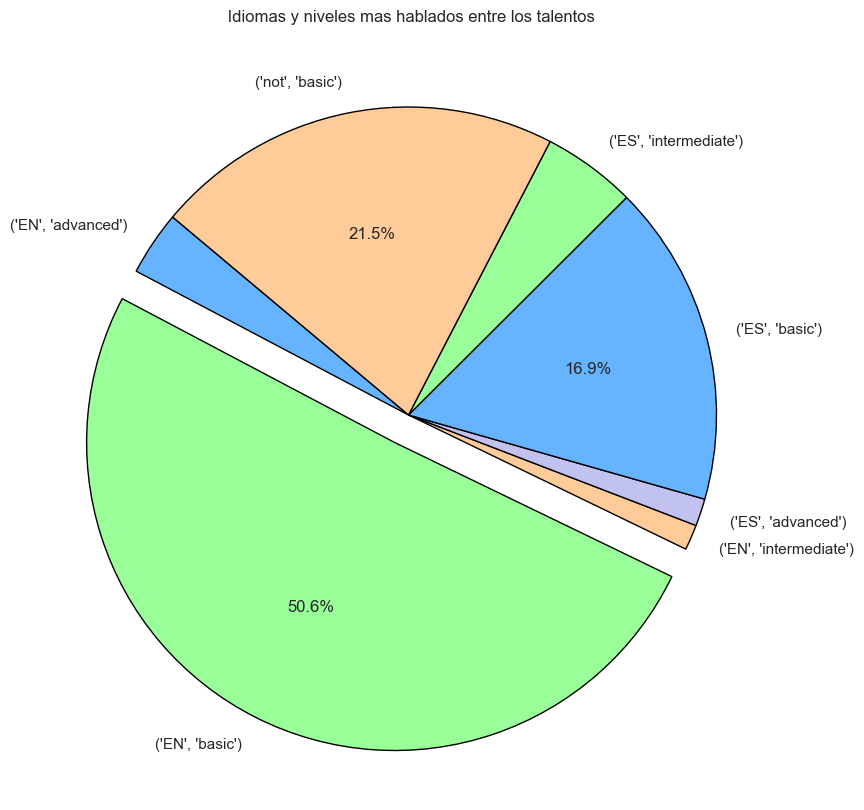

In [1350]:
plt.figure(figsize=(10,10))  # Ajustar el tamaño del gráfico según tus necesidades

explode_space = [0.1 if i == max(idioma_level[idioma_level['cantidad'] >10]['cantidad']) else 0 for i in idioma_level[idioma_level['cantidad'] >10]['cantidad']]

plt.pie(idioma_level[idioma_level['cantidad'] >10]['cantidad'],labels=idioma_level[idioma_level['cantidad'] >5]['dt'],wedgeprops=dict(edgecolor='black'),explode=explode_space, autopct=lambda p: '{:.1f}%'.format(p) if p > 10 else '', startangle=140,colors=['#66b3ff','#99ff99','#ffcc99','#c2c2f0'])

plt.title(' Idiomas y niveles mas hablados entre los talentos')


**Conclusion**

En resumen, hemos identificado que el idioma más hablado entre los talentos es el inglés, siendo dominado a nivel básico por un significativo `50.6%`. Este hallazgo destaca la importancia del inglés como un recurso lingüístico clave entre la comunidad de talentos.

Sin embargo, resulta preocupante observar que un considerable `21.5%` de los talentos no tienen conocimientos de un segundo idioma. Esta situación sugiere una brecha en las habilidades lingüísticas y plantea la necesidad de considerar estrategias para fomentar el desarrollo de competencias en este aspecto.

Estos resultados ofrecen valiosa información sobre el panorama lingüístico de la plataforma, sirviendo como base para iniciativas destinadas a fortalecer las habilidades lingüísticas y mejorar la comunicación dentro de la comunidad de TalentPitch.

### Conclusión de esta primera fase: Tasa de coincidencias entre Talentos y Convocatorias
---
En esta etapa inicial, concluimos nuestro análisis centrándonos en la tasa de coincidencias entre los talentos y las diversas convocatorias presentes en la muestra. Para ello, hemos considerado los siguientes datos clave en relación con cada convocatoria:

 * ***A nivle de convocatoria***:
- La columna `requirements`: Esta columna especifica las habilidades necesarias para el cargo. Cada requisito cumplido por el usuario equivale a 1 punto.
  
- La columna `name`: Esta columna nos permite identificar el cargo, lo cual es fundamental para unificar las aspiraciones de los talentos con las ofertas de las empresas.

- La columna `thematic_area`: Esta columna nos facilita evaluar las áreas que deben ser calificadas, proporcionando un contexto valioso para la coincidencia.
* ***A nivle de Talento***
- La columna `thematic_area`
- La columna `name`: aunque para este caso  hace referencia a los conocimientos tecnicos de los talentos
- La columna `desired_rol`: Nos ayudara a identificar que cargos lesgustaria aplicar
- La columna `career`: Para identificar el ultimo grado cursado por los talentos

- La columna `Want_to_be`: para identificar  que tipo de empresa se acomodan mejor al practicante


Al integrar estos elementos, buscamos establecer una sólida tasa de coincidencia que refleje la alineación efectiva entre las habilidades y aspiraciones de los talentos y los requisitos específicos de las convocatorias. Este enfoque estratégico nos permitirá optimizar futuras interacciones entre talentos y empresas, mejorando la eficiencia y el éxito en las colaboraciones.

In [1351]:
requisitos_conv=dt_call[['name','requirements','requirements_1','requirements_2','requirements_3','requirements_4','thematic_area']]
info_talento = dt_user[['career','want_to_be','name','desired_role','thematic_area']]


**Filtro 1 : `tehmatic_are`**

Empezaremos determinando que trabajos son para que talentos dod su thematic_area

**Conprobacion de numero de empleos por numero de talentos**

Ahora evaluaremos un teorema que habiamos evaluado cunado teorisabamos cuantos trabajos debian de ser necesario para el talento disponible

In [1352]:
filtro_1 =pd.merge(info_talento.groupby('thematic_area')['career'].count(),requisitos_conv.groupby('thematic_area')['name'].count(),on='thematic_area')
convocatorias_talento = pd.merge(requisitos_conv,info_talento,on='thematic_area')


Text(0.5, 1.0, 'Numero talentos y convocatorias existentes por cada area')

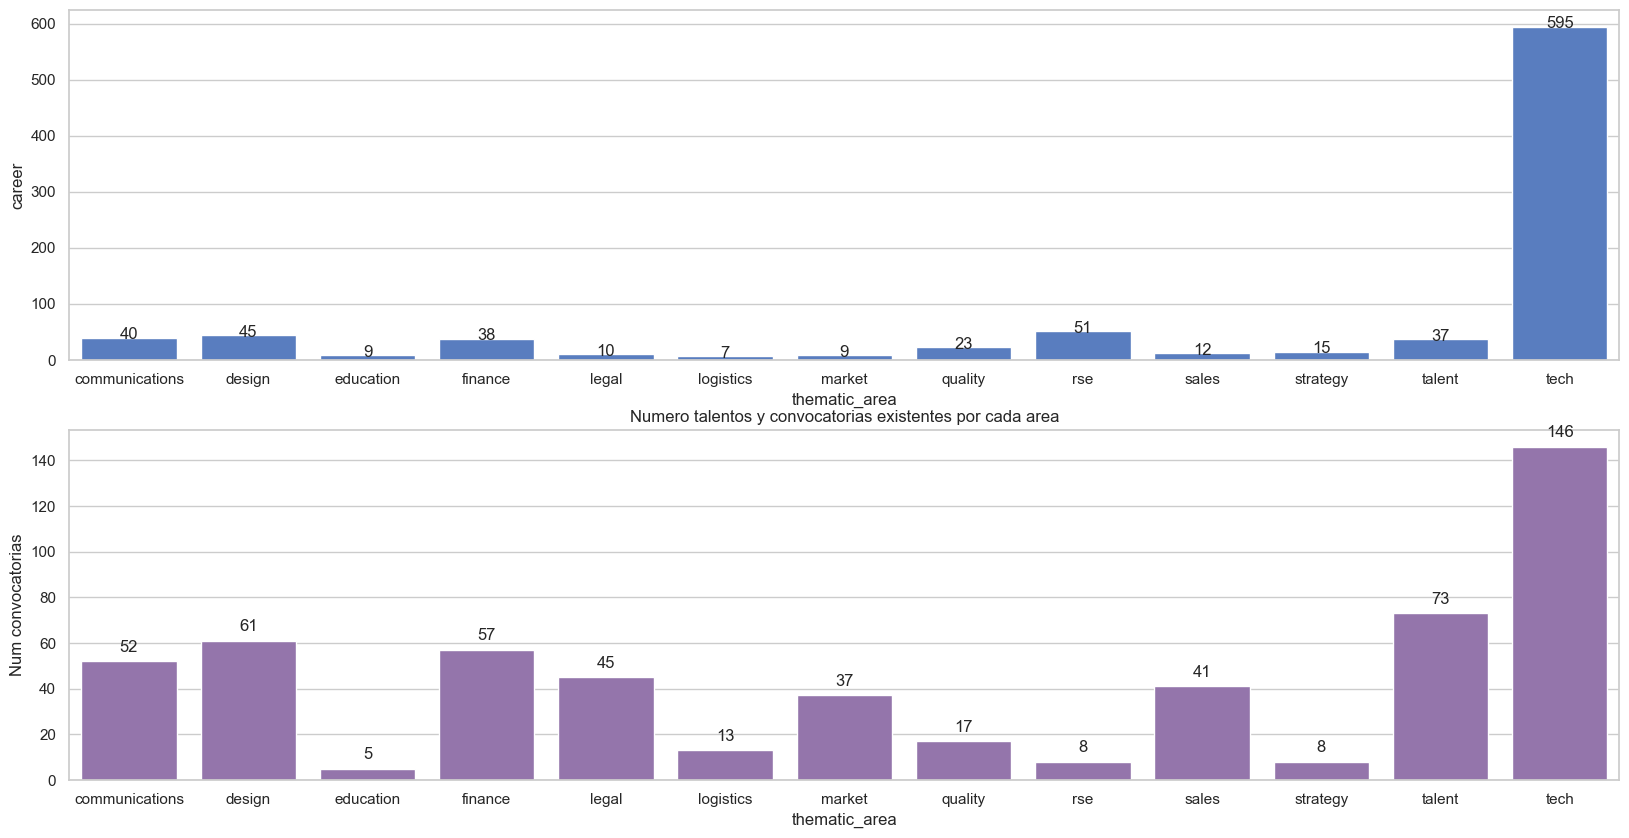

In [1353]:
filtro_1['thematic_area']= filtro_1.T.iloc[0].index

# plt.figure(figsize=(20,10))
fig,ax = plt.subplots(2,1,figsize=(20,10))
sns.barplot(filtro_1,x='thematic_area',y='career',ax=ax[0])
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 2), textcoords='offset points')

# Segundo gráfico de barras
sns.barplot(data=filtro_1, x='thematic_area', y='name', color='m', ax=ax[1])
ax[1].set_title('Nombres por área temática')

# Agregar texto sobre cada barra en el segundo gráfico
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.ylabel('Num convocatorias')
plt.title('Numero talentos y convocatorias existentes por cada area')


**Conclusiones del Análisis**

Al examinar detenidamente la gráfica generada con el `filtro 1`, que agrupa talentos y convocatorias según las categorías de `thematic_area`, hemos llegado a la conclusión de que, particularmente en el área de talento tech, hay alrededor de `4` personas interesadas por cada puesto etiquetado como _tech_. Este descubrimiento sugiere un nivel de competencia saludable en esta área específica, indicando un equilibrio adecuado entre el número de talentos disponibles y la demanda de puestos.

Sin embargo, es crucial considerar la posibilidad de un mal etiquetado o una categorización errónea, ya que esto podría tener implicaciones significativas:

- **Si la conclusión es correcta:** Podría haber puestos que buscan un perfil de personal equivocado, lo que podría afectar negativamente la eficiencia y la satisfacción laboral tanto para talentos como para empresas.

- **Si la conclusión no es correcta:** Se confirmaría que el sistema de categorización es preciso y que no hay errores significativos al buscar nuevo personal. Esto respaldaría la eficacia del proceso actual y permitiría una selección más precisa y acertada.

Es esencial abordar esta posibilidad con un enfoque analítico adicional, posiblemente mediante pruebas estadísticas y evaluación detallada de los perfiles y requisitos de las convocatorias. Esto garantizará una gestión de recursos humanos más efectiva y una mejor alineación entre las habilidades de los talentos y las expectativas de las empresas.

### **Evalucacion de hipotesis: ¿Existe algun error a la hora de categorizar las convocaotirias?**

En esta seccion evaluaremos la hipostesis planteada en la seccion anterior, donde para ello agruparemos las convocatorias segun el sistema de categorizacion `thematic_area` y con base en ello buscaremos los requisitos mas solicitados; una vez hecho esto crearemos un conteo de requisitos dado categorias `thematic_area` donde para el caso de que exista categorias repetidas las uniremos segun   categoria mas grande, esto nos dara como resultado los requsitos sin duplicados segun las categorias `theematic_area`.

In [1354]:
requisitos=pd.DataFrame(requisitos_conv.groupby(['requirements','thematic_area'])['name'].count())
requisitos=requisitos.reset_index()



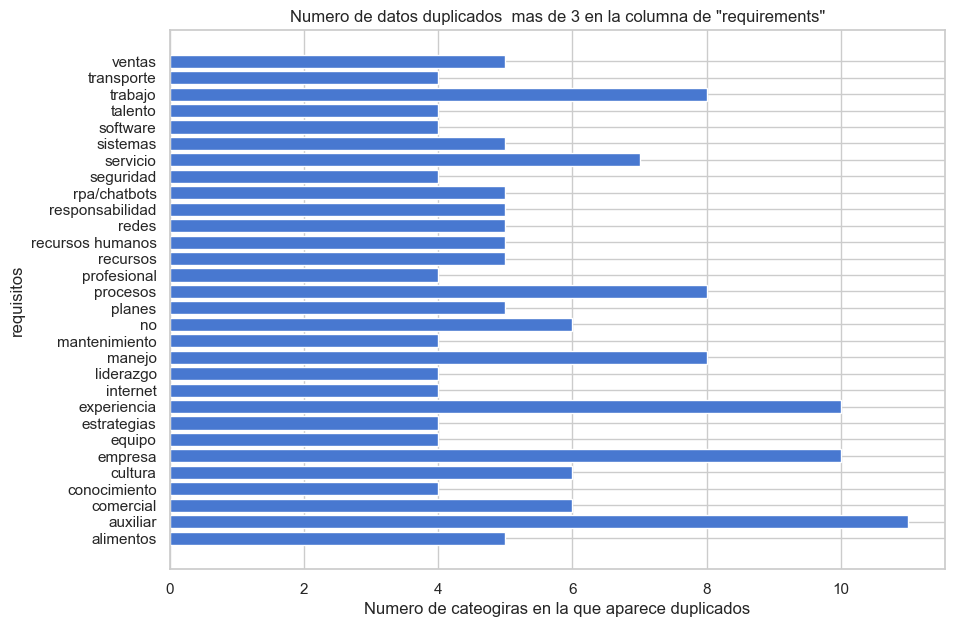

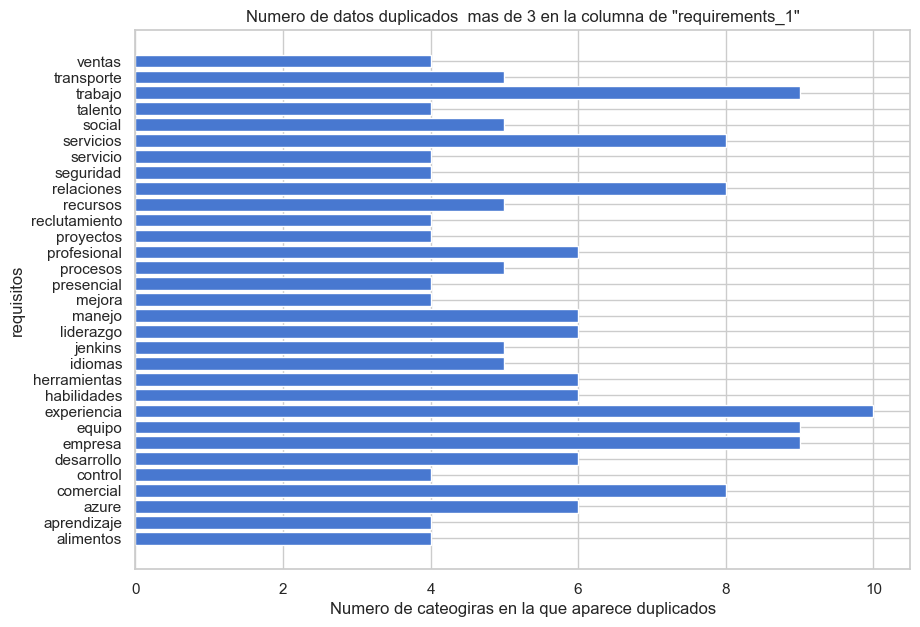

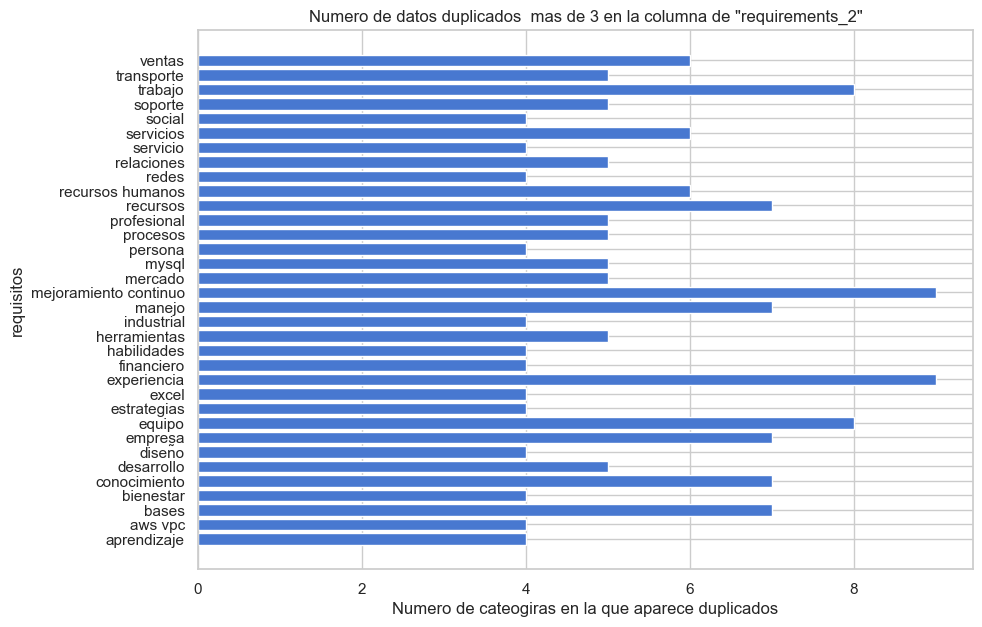

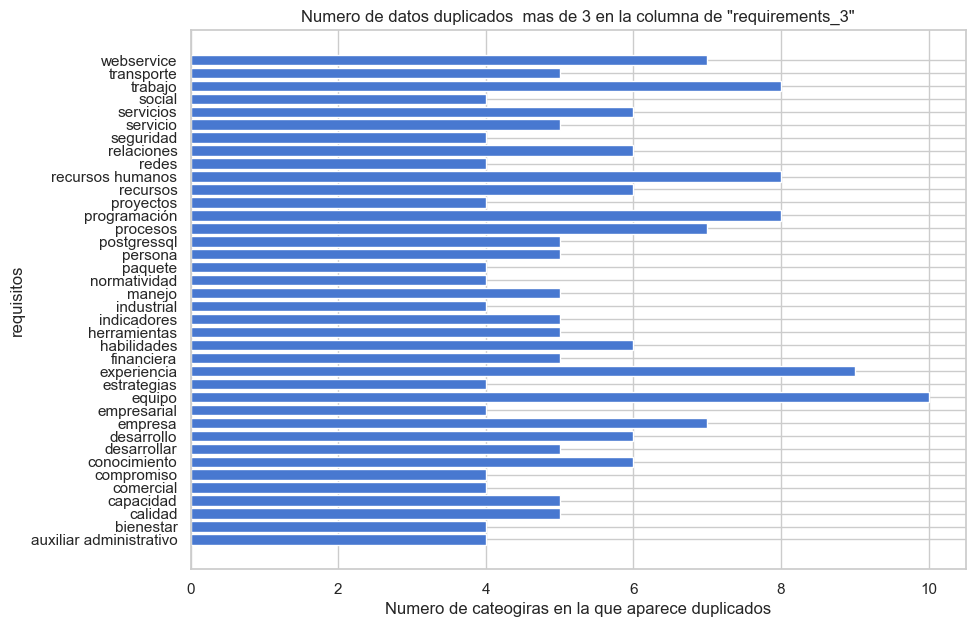

In [1355]:
#Agrupar por requirements
for x in ['requirements','requirements_1','requirements_2','requirements_3']:
    requisitos=pd.DataFrame(requisitos_conv.groupby([x,'thematic_area'])['name'].count())
    requisitos=requisitos.reset_index()
    requisitos = requisitos.rename(columns={x:'requirements'})
    requisitos

    #Analizar los duplicados 
    duplicados = pd.DataFrame(requisitos.groupby('requirements')['thematic_area'].count()).reset_index()
    media = round(duplicados['thematic_area'].mean() +1)


    plt.figure(figsize=(10,7))
    plt.barh(duplicados[duplicados['thematic_area'] > media]['requirements'],duplicados[duplicados['thematic_area'] >media]['thematic_area'])
    plt.xlabel('Numero de cateogiras en la que aparece duplicados')
    plt.ylabel('requisitos')
    plt.title(f'Numero de datos duplicados  mas de {media} en la columna de "{x}"')


**Conclusion temprana**

En conclusión preliminar, hemos identificado la presencia de datos duplicados en nuestra información. Sin embargo, para abordar este problema, aplicaremos el modelo _ztest_. En este análisis, nos centraremos en la columna `requirements` después de realizar una corrección de etiquetas. Esta corrección implica cambiar las etiquetas duplicadas, basándonos en una regresion logistica el cual definira las  nuevas etiquetas de `thematic_area`, y estos datos corregidos se guardarán en un conjunto de datos separado.

Posteriormente, compararemos el conjunto de datos original de `requirements` con el conjunto que contiene las correcciones, centrándonos en aquellos registros donde `thematic_area = tech`. Este análisis nos permitirá evaluar todos los datos existentes en esta categoría, asegurando su coincidencia entre ambos conjuntos de datos y con ello la hipotesis.

### **Filtrado de datos**


In [1356]:
requisitos=dt_call[['requirements',	'thematic_area',	'requirements_1',	'requirements_2',	'requirements_3',	'requirements_4','name']]
requisitos=requisitos.groupby(['thematic_area','requirements','requirements_1',	'requirements_2',	'requirements_3',	'requirements_4']).count()
requisitos=requisitos.reset_index()
requisitos = requisitos.rename(columns={'name':'cantidad_repetidos'})


In [1357]:
def Dicc_requirements(dataset):
    column = ['requirements','requirements_1',	'requirements_2',	'requirements_3',	'requirements_4']
    result ={}
    count =0
    for x in column:
        for dato in dataset[x].unique():
            if not result.__contains__(dato):
                result.setdefault(dato,count)
            count +=1
    return result

dicc_requirements=Dicc_requirements(requisitos)



In [1358]:
#Traduccion str a int
requisitos['requirements']=requisitos['requirements'].apply(lambda x: dicc_requirements[x])
requisitos['requirements_1']=requisitos['requirements_1'].apply(lambda x: dicc_requirements[x])
requisitos['requirements_2']=requisitos['requirements_2'].apply(lambda x: dicc_requirements[x])
requisitos['requirements_3']=requisitos['requirements_3'].apply(lambda x: dicc_requirements[x])
requisitos['requirements_4']=requisitos['requirements_4'].apply(lambda x: dicc_requirements[x])

#diccionario thematic_area
dicc_thematic=dict(enumerate(requisitos['thematic_area'].unique()))
dicc_thematic_ = {v:k for k,v in dicc_thematic.items()}

#Traduccion de dematic area 
requisitos['thematic_area']=requisitos['thematic_area'].apply(lambda x: dicc_thematic_[x])



#### Prediccion de nuevas etiquetas

In [1359]:
requisitos[requisitos['cantidad_repetidos'] ==1][['requirements','requirements_1',	'requirements_2',	'requirements_3',	'requirements_4']]


,requirements,requirements_1,requirements_2,requirements_3,requirements_4
1,1,12,17,100,98
2,2,28,14,510,17
3,2,30,14,510,17
4,3,172,37,49,21
5,4,125,35,28,14
...,...,...,...,...,...
592,103,27,23,63,14
593,164,49,30,43,75
594,30,12,45,13,42
595,165,145,154,648,692


### Creacion y prediccion del modelo regresion logistica

In [1360]:
x_train = requisitos[requisitos['cantidad_repetidos'] ==1][['requirements','requirements_1',	'requirements_2',	'requirements_3',	'requirements_4']]
y_train = requisitos[requisitos['cantidad_repetidos'] ==1]['thematic_area']

nueva_cateogrizacion = requisitos[requisitos['cantidad_repetidos'] !=1][['requirements','requirements_1',	'requirements_2',	'requirements_3',	'requirements_4']]
y_test = requisitos[requisitos['cantidad_repetidos'] !=1]['thematic_area']


In [1361]:
from sklearn.metrics import accuracy_score, classification_report

logisitc_regression = LogisticRegression() 
logisitc_regression.fit(x_train,y_train)
test_prediccion=logisitc_regression.predict(nueva_cateogrizacion)


c:\Users\Carlos\Desktop\Proyector Carlos\2024\Prueba BI (1) (2)\Prueba BI\BI\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1362]:
dicc_requirements = {v:k for k,v in dicc_requirements.items()}

#traduccion de int a str de requirements
for x in nueva_cateogrizacion.columns:
    nueva_cateogrizacion[x]=nueva_cateogrizacion[x].apply(lambda x: dicc_requirements[x])
    requisitos[x] = requisitos[x].apply(lambda x: dicc_requirements[x]) 

#traduccion de int a str de thematic_area
nueva_cateogrizacion['thematic_area'] = [dicc_thematic[x] for x in test_prediccion]
requisitos['thematic_area'] = requisitos['thematic_area'].apply(lambda x: dicc_thematic[x])


**Evidencia del Funcionamiento del Filtrado: Comparación entre el Etiquetador Antiguo y el Nuevo Etiquetador con Datos de la Columna 'Requirements'**

Con el objetivo de resaltar las diferencias entre el antiguo etiquetador y el nuevo etiquetador, llevaremos a cabo una comparación específica utilizando datos de la columna 'Requirements'. La idea central es seleccionar un dato presente en esta columna y evaluar cuántas categorías diferentes se le asignan tanto en el etiquetador antiguo como en el nuevo etiquetador mediante la regresión logística.

Este enfoque nos permitirá no solo identificar las discrepancias en la categorización, sino también cuantificar la mejora y la precisión que aporta el nuevo etiquetador. Al seleccionar un ejemplo concreto, lograremos una comprensión detallada de cómo ambos sistemas manejan y clasifican los datos de manera única.



In [1363]:
requisitos[requisitos['cantidad_repetidos'] > 1][requisitos['requirements'] =='auxiliar'][['requirements','thematic_area']]


C:\Users\Carlos\AppData\Local\Temp\ipykernel_13108\2496058875.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  requisitos[requisitos['cantidad_repetidos'] > 1][requisitos['requirements'] =='auxiliar'][['requirements','thematic_area']]


,requirements,thematic_area
246,auxiliar,legal
410,auxiliar,production
412,auxiliar,rse
445,auxiliar,strategy
448,auxiliar,suppliers
499,auxiliar,tech


In [1364]:
nueva_cateogrizacion[nueva_cateogrizacion['requirements'] =='auxiliar'][['requirements','thematic_area']]


,requirements,thematic_area
246,auxiliar,communications
410,auxiliar,communications
412,auxiliar,communications
445,auxiliar,communications
448,auxiliar,communications
499,auxiliar,communications


Como podemos ver cuando `requirements ` vale `auxiliar` en el dataset de requisitos  tiene un total de 1 disitintas categorias; por otro lado nuestro modelo nuevo de etiquetado da tan solo una unica etiqueta 

### Evalucion de la hipotesis
***
- **Hipótesis Nula (_H0_):** No hay mal etiquetado; la proporción de categoría A y categoría B es la misma que se espera.

- **Hipótesis Alternativa (_H1_):** Existe mal etiquetado; la proporción de categoría A y categoría B no es la misma que se espera.

In [1365]:
longitud = []
for x in range(len(nueva_cateogrizacion)):
    
    datos = list(nueva_cateogrizacion.iloc[x][:])
    condiciones = (
        (dt_call['requirements'] == datos[0]) &
        (dt_call['requirements_1'] != datos[1]) &
        (dt_call['requirements_2'] !=datos[2]) &
        (dt_call['requirements_3'] != datos[3]) &
        (dt_call['requirements_4'] != datos[4])
    )
    
    # Aplicar las condiciones y almacenar en una variable
    
    longitud +=[[datos[-1],len(dt_call[condiciones])]]    
nueva_cateogrizacion_datos=pd.DataFrame(longitud,columns=['thematic_area','Cantidad_duplicados'])


In [1366]:
from statsmodels.stats.proportion import proportions_ztest
promedio = []
for x in nueva_cateogrizacion_datos['thematic_area'].unique():
    alpha = 1-0.95

    long_muestra = nueva_cateogrizacion_datos['Cantidad_duplicados'].sum()
    categoriazacion_nueva = nueva_cateogrizacion_datos[nueva_cateogrizacion_datos['thematic_area'] ==x]['Cantidad_duplicados'].sum()
    categoriazacion_antigua = requisitos[requisitos['cantidad_repetidos'] > 1][requisitos['thematic_area']==x]['cantidad_repetidos'].sum()

    categorias = np.array([categoriazacion_nueva,categoriazacion_antigua])
    muestra = np.array([long_muestra,long_muestra])

    #EValucaion de hipotesis
    p_value = proportions_ztest(count=categorias,nobs=muestra)[1]
    promedio +=[p_value]




C:\Users\Carlos\AppData\Local\Temp\ipykernel_13108\3070598630.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  categoriazacion_antigua = requisitos[requisitos['cantidad_repetidos'] > 1][requisitos['thematic_area']==x]['cantidad_repetidos'].sum()
C:\Users\Carlos\AppData\Local\Temp\ipykernel_13108\3070598630.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  categoriazacion_antigua = requisitos[requisitos['cantidad_repetidos'] > 1][requisitos['thematic_area']==x]['cantidad_repetidos'].sum()
C:\Users\Carlos\AppData\Local\Temp\ipykernel_13108\3070598630.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  categoriazacion_antigua = requisitos[requisitos['cantidad_repetidos'] > 1][requisitos['thematic_area']==x]['cantidad_repetidos'].sum()
C:\Users\Carlos\AppData\Local\Temp\ipykernel_13108\3070598630.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  categoriaza

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Grafica de distirbucion de de la antigua categorizacion con la nuevas categorizacion')

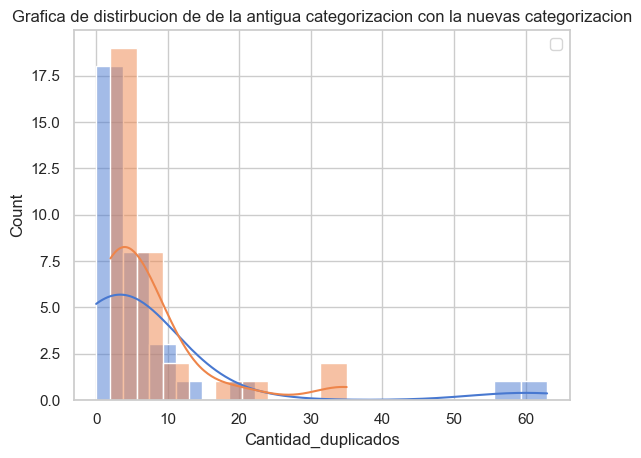

In [1367]:
sns.histplot(nueva_cateogrizacion_datos['Cantidad_duplicados'],kde=True,stat='count')
sns.histplot(requisitos[requisitos['cantidad_repetidos'] > 1]['cantidad_repetidos'],kde=True,stat='count')
plt.legend()
plt.title('Grafica de distirbucion de de la antigua categorizacion con la nuevas categorizacion')


In [1368]:
if alpha > np.mean(promedio[:-1]):
    print("Se rechaza la hipotesis Nula : Es decir, que existe  un error a la hora de cateogrizar ")
else:
    print("Se acepta la hipotesis Nula: es decir, que no existe ningun error a la hora de categorizar")


Se rechaza la hipotesis Nula : Es decir, que existe  un error a la hora de cateogrizar 


In [1369]:
nueva_cateogrizacion_datos=nueva_cateogrizacion_datos.groupby('thematic_area')['Cantidad_duplicados'].sum().reset_index()
requisitos=requisitos[requisitos['cantidad_repetidos']==1].groupby('thematic_area')['cantidad_repetidos'].sum().reset_index()

res = []
for x in range(len(requisitos)):
    dato_2 = list(requisitos.iloc[x])
    for y in range(len(nueva_cateogrizacion_datos)):
        dato_1 = list(nueva_cateogrizacion_datos.iloc[y])
        if dato_1[0] == dato_2[0]:
            dato_2[-1] += dato_1[-1]
    res +=[dato_2]
requisitos=pd.DataFrame(res,columns=['thematic_area','cantidad'])


Text(0.5, 1.0, 'Numero talentos y convocatorias existentes por cada area')

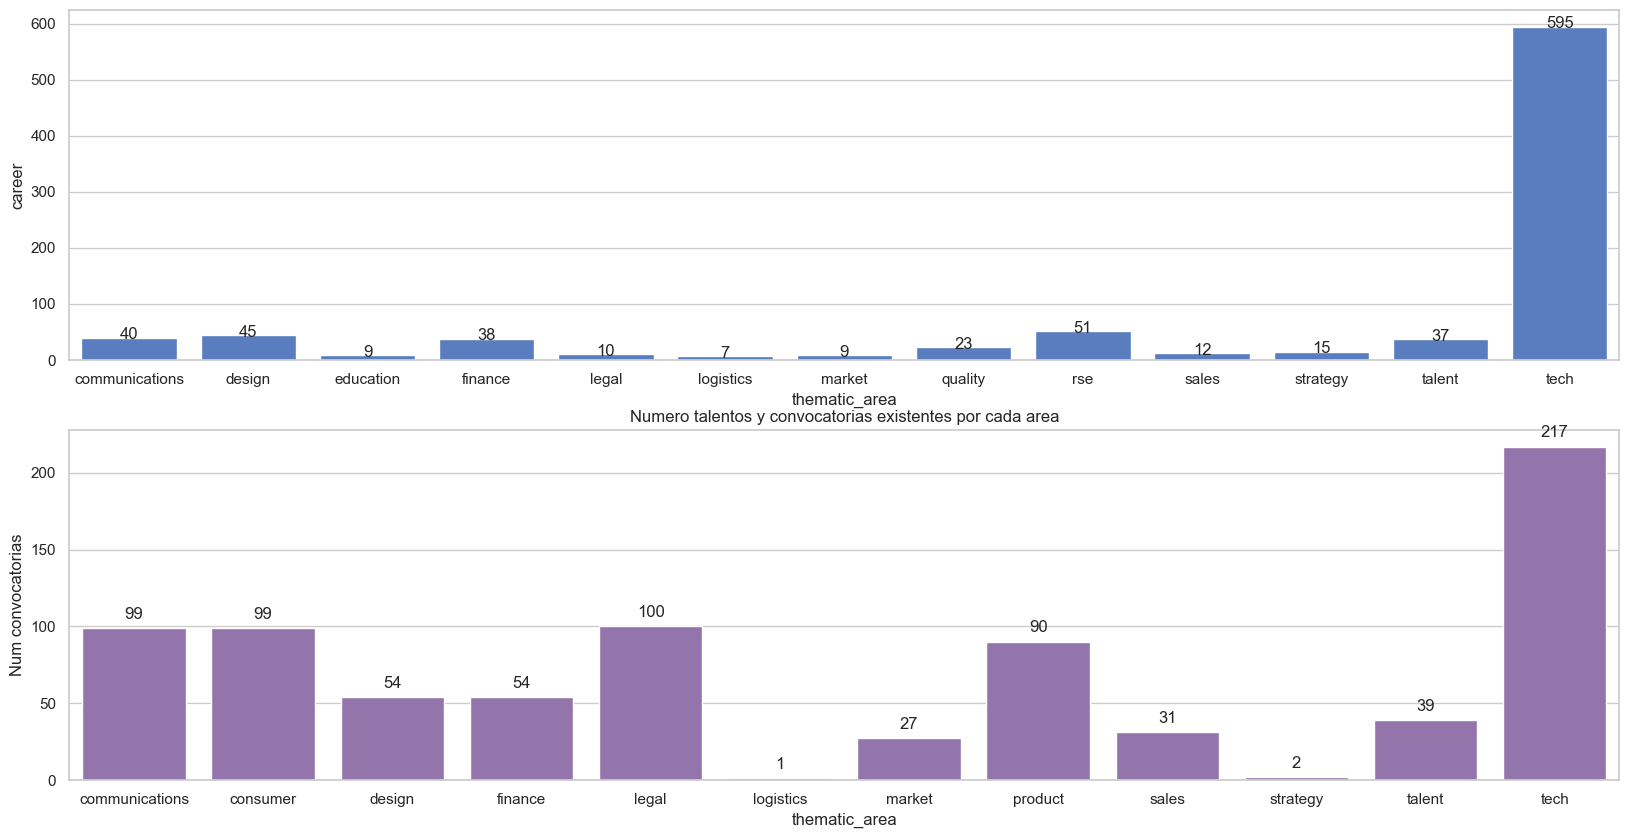

In [1371]:
filtro_1['thematic_area']= filtro_1.T.iloc[0].index

# plt.figure(figsize=(20,10))
fig,ax = plt.subplots(2,1,figsize=(20,10))
sns.barplot(filtro_1,x='thematic_area',y='career',ax=ax[0])
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 2), textcoords='offset points')

# Segundo gráfico de barras
sns.barplot(data=requisitos, x='thematic_area', y='cantidad', color='m', ax=ax[1])
ax[1].set_title('Nombres por área temática')

# Agregar texto sobre cada barra en el segundo gráfico
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.ylabel('Num convocatorias')
plt.title('Numero talentos y convocatorias existentes por cada area')


**Conclusion del analisis**

En conclusión, al aplicar la nueva categorización con Regresión Logística, se observa un cambio significativo en la distribución de las convocatorias. Esta nueva metodología permite una categorización más precisa, revelando con mayor exactitud el número de puestos disponibles y la cantidad de talentos que aplican para dichos puestos. Este análisis confirma la tendencia previamente identificada de contar con aproximadamente 2 talentos por cada puesto técnico.

Sin embargo, lo más sorprendente es el aumento de relevancia en otras áreas, lo que indica una creciente demanda de talento en esos sectores. Este hallazgo sugiere que existe una necesidad de talento específico para hacer coincidir con las oportunidades laborales en estas áreas emergentes. En consecuencia, este enfoque más preciso en la categorización podría ser crucial para mejorar la identificación y selección de talento en diversas áreas, fortaleciendo así el proceso de matching entre los candidatos y las oportunidades laborales disponibles.

### **Resumen de la Investigación Realizada**

Al iniciar este estudio, mi enfoque estaba en analizar la relación entre el talento y las convocatorias. Sin embargo, los análisis previos revelaron hallazgos significativos:

1. **Análisis de la Categorización en Relación con las Carreras de los Talentos:**
   - Resultado del análisis: El 59.4% de los talentos están enfocados en el área tech, mientras que el 10.4% no tiene una categoría aparente.

2. **Identificación de la Carrera Más Representativa en el Área Tech y Others:**
   - Resultados del análisis: El 42.2% de los talentos tech son ingenieros en sistemas.

3. **Análisis del Tipo de Contrato Preferido por el Talento:**
   - Resultados del análisis: El 68.7% de los talentos buscan ser empleados en alguna empresa.

4. **Segundo Idioma Más Hablado:**
   - Resultados del análisis: El 50.6% de los talentos dominan el idioma inglés a un nivel básico.

5. **Número de Convocatorias Disponibles según el `Thematic Area` del Talento:**
   - Resultados del análisis: Hay 4 talentos tech interesados por cada puesto con la misma etiqueta.

6. **Planteamiento de Hipótesis:**
   - Se formuló la hipótesis de evaluar si el etiquetado de las convocatorias era el más óptimo.

7. **Evaluación de la Hipótesis:**
   - Como conclusión del planteamiento de la hipótesis, se encontró que el modelo de categorización existente era el menos apropiado. Durante la evaluación, se propuso la categorización de las convocatorias utilizando una regresión logística.

Este resumen destaca los principales descubrimientos y pasos seguidos durante la investigación, proporcionando una visión general clara de los resultados obtenidos.